In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [2]:
house_df = pd.read_csv("/Users/khadr/kc_house_data.csv",sep=',')

In [3]:
house_df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house_df.shape


(21613, 21)

In [5]:
house_df.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
house_df=house_df.drop(["id"],axis=1)


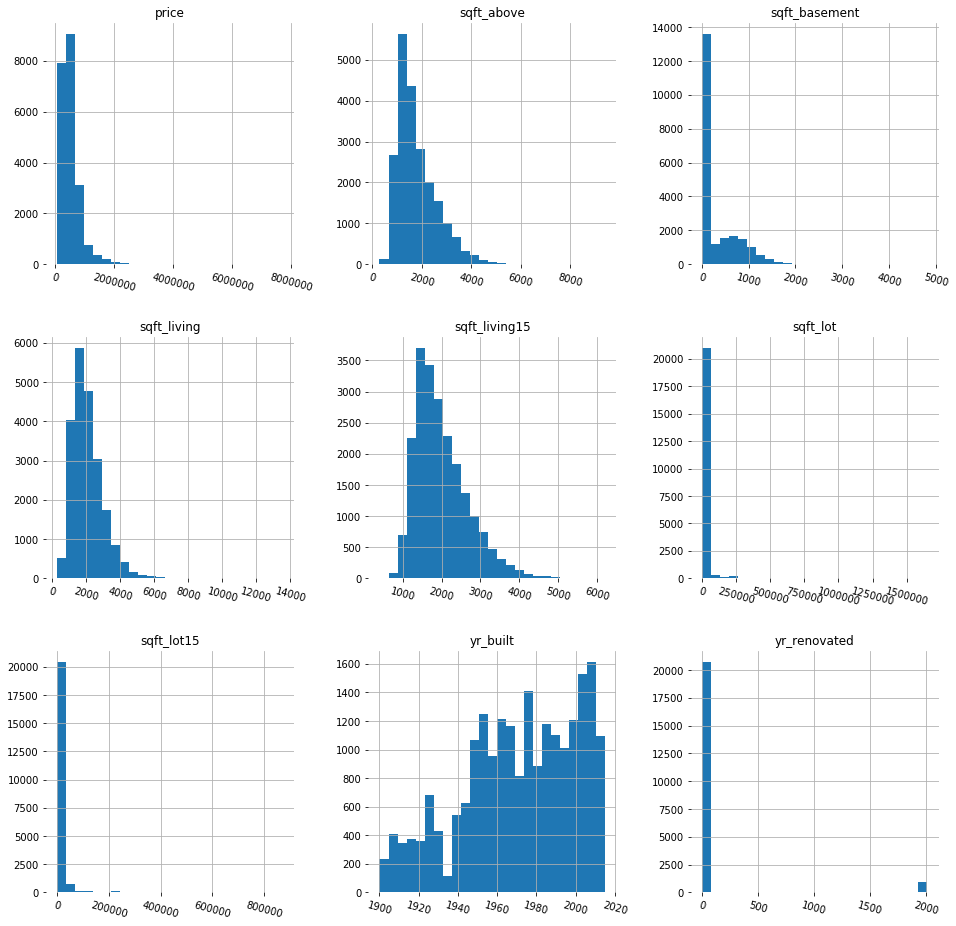

In [7]:
df1=house_df[['price', 'sqft_living', 'sqft_basement','sqft_lot', 'sqft_above',  'sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

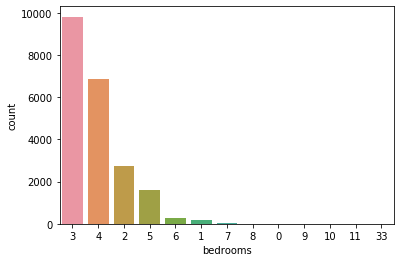

In [8]:
sns.countplot(house_df.bedrooms, order = house_df['bedrooms'].value_counts().index)


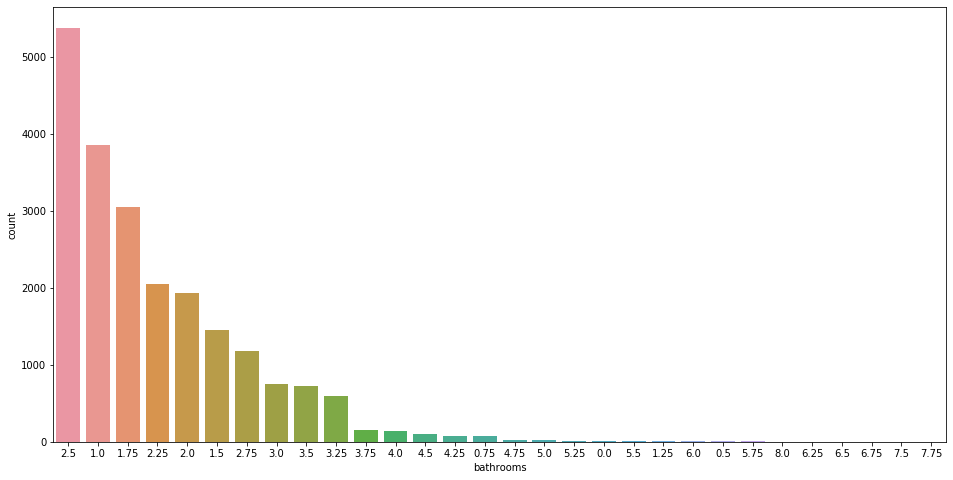

In [9]:
plt.figure(figsize=(16,8))
sns.countplot(house_df.bathrooms, order = house_df['bathrooms'].value_counts().index)

Text(0.5, 1.0, 'Grade Bar Plot')

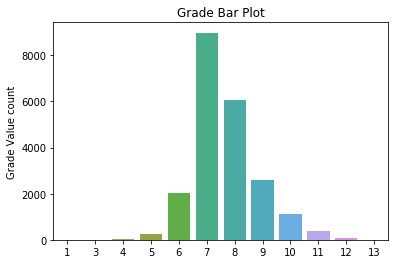

In [10]:
sns.countplot(x="grade", data=house_df)
plt.ylabel("Grade Value count")
plt.xlabel(" ")
plt.title("Grade Bar Plot")

Text(0.5, 1.0, 'Condition of a house Bar Plot')

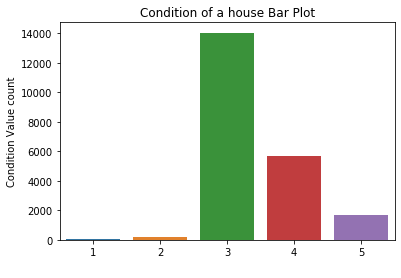

In [11]:
sns.countplot(x="condition", data=house_df)
plt.ylabel("Condition Value count")
plt.xlabel(" ")
plt.title("Condition of a house Bar Plot")

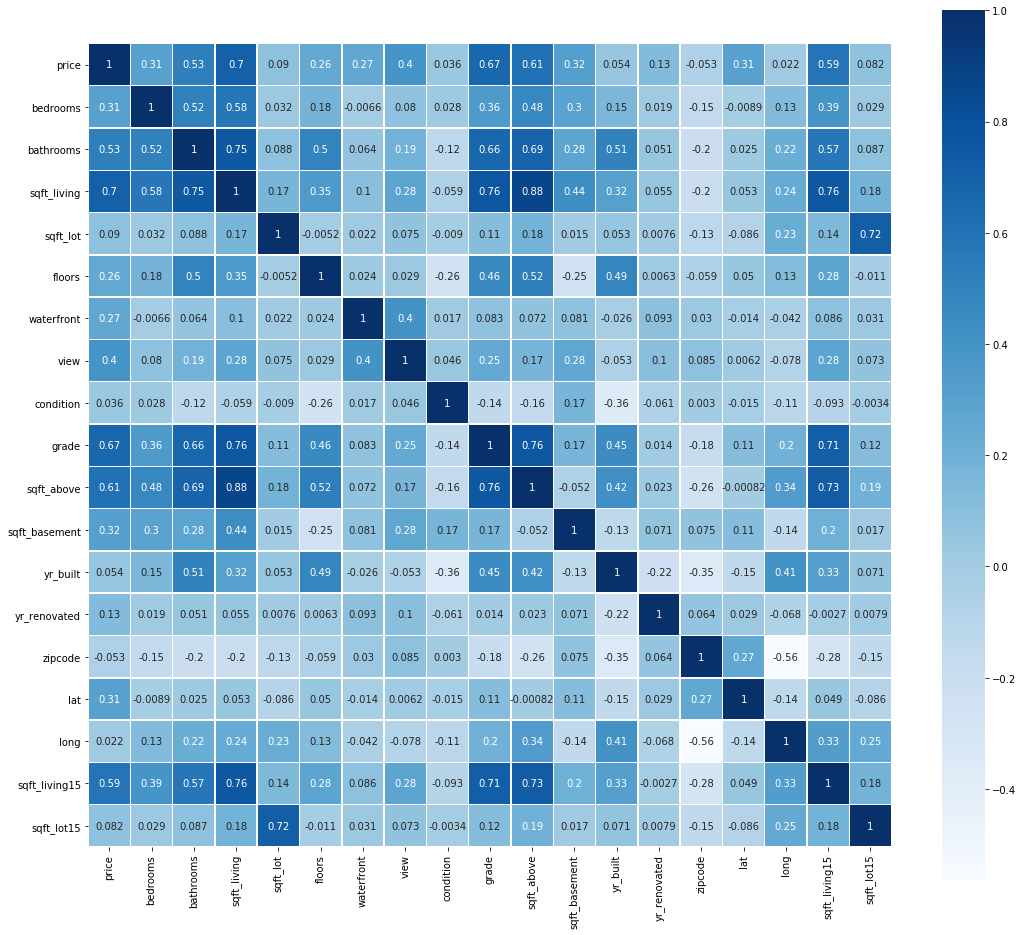

In [12]:
corr = house_df.corr()
plt.figure(figsize=(18,16))
sns.heatmap(corr,cmap="Blues",annot=True, square=True,linewidths=.5)

In [13]:
pd.options.display.float_format = '{:,.0f}'.format
house_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,"221,900",3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,48,-122,1340,5650
1,20141209T000000,"538,000",3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,48,-122,1690,7639
2,20150225T000000,"180,000",2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,48,-122,2720,8062
3,20141209T000000,"604,000",4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,48,-122,1360,5000
4,20150218T000000,"510,000",3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,48,-122,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,"360,000",3,2,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,48,-122,1530,1509
21609,20150223T000000,"400,000",4,2,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,48,-122,1830,7200
21610,20140623T000000,"402,101",2,1,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,48,-122,1020,2007
21611,20150116T000000,"400,000",3,2,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,48,-122,1410,1287


In [14]:
house_df[["price","bedrooms","bathrooms","sqft_living","sqft_lot","sqft_above","yr_built","sqft_living15","sqft_lot15"]].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15
count,"21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613"
mean,"540,088",3,2,"2,080","15,107","1,788","1,971","1,987","12,768"
std,"367,127",1,1,918,"41,421",828,29,685,"27,304"
min,"75,000",0,0,290,520,290,"1,900",399,651
25%,"321,950",3,2,"1,427","5,040","1,190","1,951","1,490","5,100"
50%,"450,000",3,2,"1,910","7,618","1,560","1,975","1,840","7,620"
75%,"645,000",4,2,"2,550","10,688","2,210","1,997","2,360","10,083"
max,"7,700,000",33,8,"13,540","1,651,359","9,410","2,015","6,210","871,200"


<Figure size 576x360 with 0 Axes>

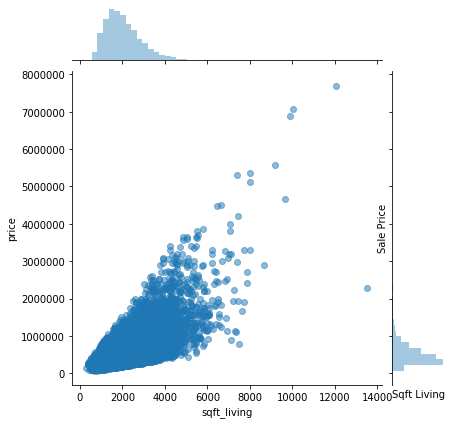

In [15]:
plt.figure(figsize = (8, 5))
sns.jointplot(house_df.sqft_living, house_df.price,
              alpha = 0.5)
plt.xlabel('Sqft Living')
plt.ylabel('Sale Price')
plt.show()

<Figure size 576x360 with 0 Axes>

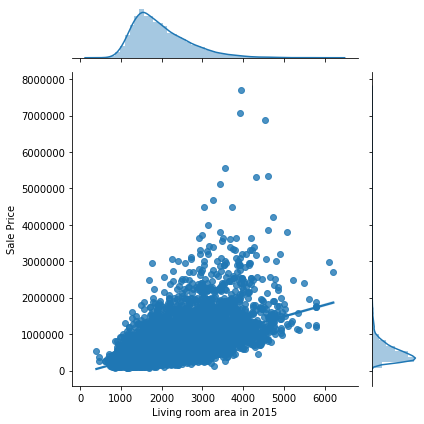

In [16]:
plt.figure(figsize = (8, 5))
X = house_df.sqft_living15
y = house_df.price
ax = sns.jointplot(X, y, kind='reg' )
ax.set_axis_labels(xlabel='Living room area in 2015', ylabel='Sale Price')
plt.tight_layout()
plt.show()

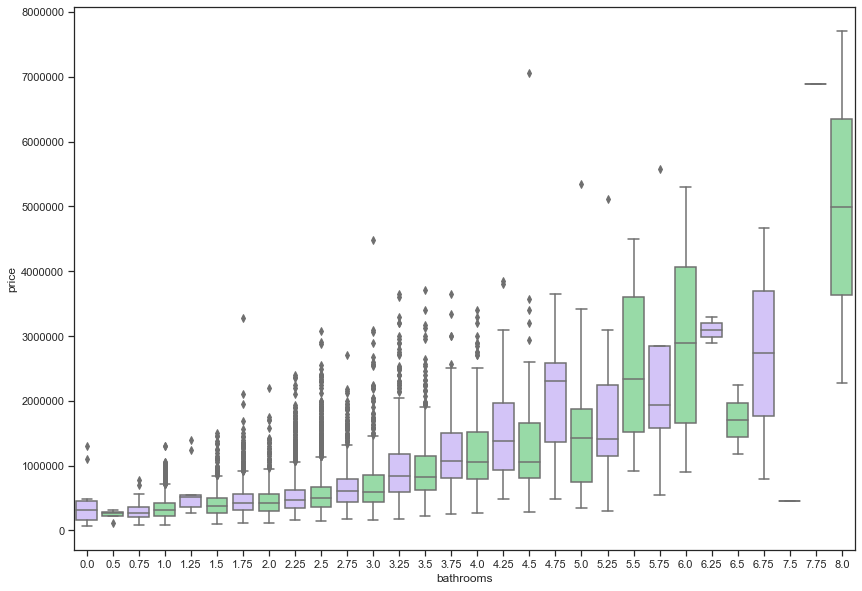

In [17]:
sns.set(style='ticks',palette='pastel')
fig, ax = plt.subplots(figsize=(14,10)) 
sns.boxplot(x='bathrooms',y='price',palette=["m", "g"], data=house_df,ax=ax)

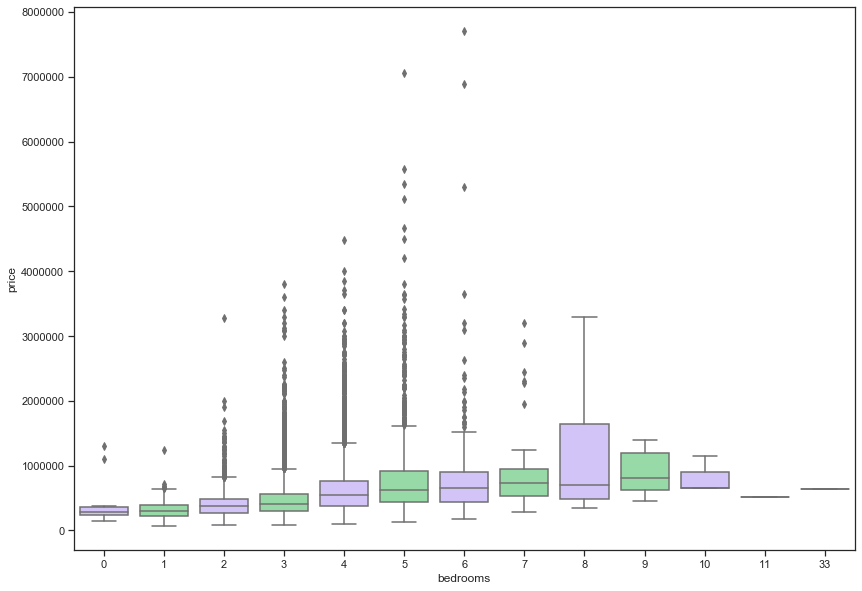

In [18]:
sns.set(style='ticks',palette='pastel')
fig, ax = plt.subplots(figsize=(14,10)) 
sns.boxplot(x='bedrooms',y='price',palette=["m", "g"], data=house_df,ax=ax)

In [19]:
x=house_df[['bedrooms']].values
y=house_df['price'].values
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)
LinReg=LinearRegression()
LinReg.fit(X_train,y_train)
predicted=LinReg.predict(X_test)
print('Coefficients: \n', LinReg.coef_)

print("MSE : {:.2f}".format(mean_squared_error(y_test,predicted)))
print("R squared : {:.2f}".format(metrics.r2_score(y_test,predicted)))

Coefficients: 
 [121054.87265313]
MSE : 112502843439.77
R squared : 0.10


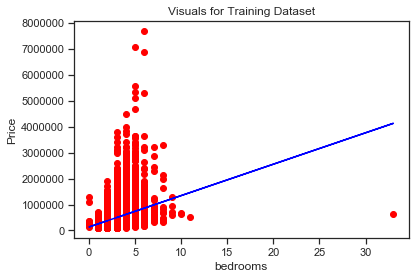

In [20]:
plt.scatter(X_train, y_train, color= 'red')
plt.plot(X_train, LinReg.predict(X_train), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("bedrooms")
plt.ylabel("Price")
plt.show()

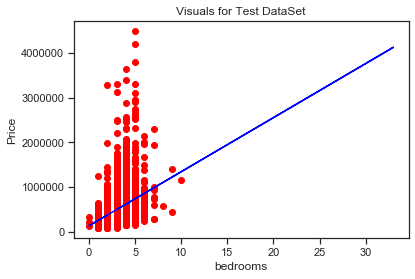

In [21]:
plt.scatter(X_test, y_test, color= 'red')
plt.plot(X_train, LinReg.predict(X_train), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("bedrooms")
plt.ylabel("Price")
plt.show()